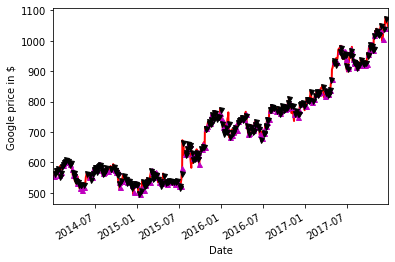

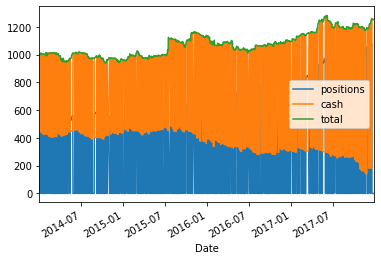

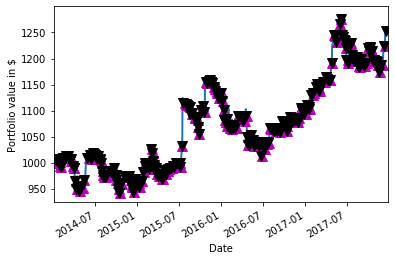

In [2]:
from pandas_datareader import data
start_date = '2014-01-01'
end_date = '2018-01-01'
goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)


import numpy as np
import pandas as pd

goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'][:] = np.where(goog_data_signal['daily_difference'][:] > 0, 1.0, 0.0)

goog_data_signal['positions'] = goog_data_signal['signal'].diff()

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='m')

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='k')

#plt.show()


# Set the initial capital
initial_capital= float(1000.0)

positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)


positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio.plot()
plt.show()


fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[goog_data_signal.positions == 1.0].index,portfolio.total[goog_data_signal.positions == 1.0],'^', markersize=10, color='m')
ax1.plot(portfolio.loc[goog_data_signal.positions == -1.0].index,portfolio.total[goog_data_signal.positions == -1.0],'v', markersize=10, color='k')
plt.show()